In [57]:
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
dataset = p.read_excel(r'C:\Users\kraja\OneDrive\Desktop\RIAA-1\data\RFM.xlsx')
dataset.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary
0,0,12347,40,2,35.9
1,1,12350,310,1,40.0
2,2,12352,262,1,17.4
3,3,12357,33,2,110.7
4,4,12359,58,2,33.0


In [59]:
Churn_period = 180
Churn_period

180

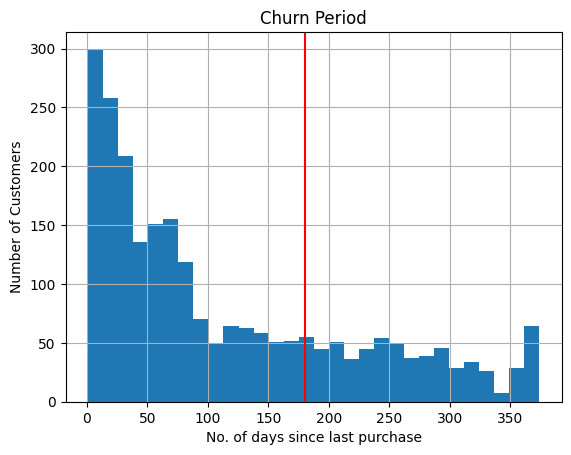

In [60]:
dataset['Recency'].hist(bins=30)
pl.axvline(180, color='r')
pl.title('Churn Period')
pl.xlabel('No. of days since last purchase')
pl.ylabel('Number of Customers')
pl.show()

In [61]:
dataset['Churned'] = (dataset['Recency']>Churn_period).astype('int64')

In [62]:
x = dataset[['Recency', 'Frequency', 'Monetary']]
y = dataset['Churned']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=43)

classification_model = LogisticRegression(
    class_weight='balanced',
    C=100,
    solver='liblinear'
)

classification_model.fit(x_train, y_train)



LogisticRegression(C=100, class_weight='balanced', solver='liblinear')

In [63]:


y_predict = classification_model.predict(x_test)
print('classification_report')
print(classification_report(y_test, y_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))
print('Accuracy Score')
print(accuracy_score(y_test, y_predict)*100)



classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       702
           1       0.98      0.98      0.98       251

    accuracy                           0.99       953
   macro avg       0.99      0.99      0.99       953
weighted avg       0.99      0.99      0.99       953

Confusion Matrix
[[698   4]
 [  5 246]]
Accuracy Score
99.05561385099685


In [64]:
dataset['Churned'].value_counts(normalize=True)

Churned
0    0.738765
1    0.261235
Name: proportion, dtype: float64

In [68]:
user_input = input("Enter values as Recency, Frequency and Monetary (comma separated): ")
check = list(map(float, user_input.split(',')))
prediction = classification_model.predict([check])

if prediction[0] == 1:
    print("Churned")
else:
    print("Not Churned")


Not Churned


f:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
print(dict(zip(["Recency", 'Frequency', 'Monetary'], classification_model.coef_[0])))

{'Recency': np.float64(0.23400264201258636), 'Frequency': np.float64(-0.5209774199280679), 'Monetary': np.float64(-0.006953388221158857)}
